## Detection of Alzhiemer's Disease

### Group Members
- #### Russell Quaicoo
- #### Raynard Dodzi
- #### Okai Ernest Larbi
- #### Dodoo Albert Ankomah
- #### Richmond Acheampong


### What is Alzhiemer's Disease?
- It is the most common type of dementia.

- Dementia is not an illness or a disease in itself, but it is a broad term used to describe a range of signs and symptoms that occur when the brain is affected by certain diseases or conditions.

- Alzhimer's Disease bigins with a mild memory loss and possibly leading to loss of the ability to carry on a conversation and respond to the environment.

- It is a disease which involves the brain in aspects of language, memory and thinking abilities.


### Problem
According to the latest WHO data published in 2018 Alzheimers & Dementia Deaths in Ghana reached 2,672 or 1.33% of total deaths. The age adjusted Death Rate is 30.17 per 100,000 of population ranks Ghana #58 in the world.

##### We are using machine learning to detect Alzhiemer's Disease in it's early stages for early treatment, thus preventing an escalation of the disease.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/oasis_longitudinal.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


**Description of dataset columns**

| Column | Description |
| -------- | ------------------------  |
| Subject ID | Unique values representing subjects in data |
| MRI ID | Unique values representing MRI scans |
| Group | Whether or nor subjects are demented |
| EDUC | Years of education of subjects |
| M/F | Sex of subjects |
| Age | Age of subjects |
| SES | Social economic status |
| MMSE | Mini Mental State Examination |
|ASF | Atlas Scaling Factor |
| CDR | Clinical Dimentia Rating |
| eTIV | Estimated Total Intracranial Volume |
| nWBV | Normalize Whole Brain Volume |


In [3]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


Age range is between 60 and 96 years

Minimum number of years of education for subjects in the database is 6 and the maximum is 23.
Averagely, each person studied for about 14 years. 

In [4]:
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

14 values for the Social Economic Status column do not exist and 2 values for the Mini Mental State Examination do not exist.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


All the columns are numerical except for the columns 'Subject ID', "MRI ID" and "Group" which are categorical



In [6]:
columns = ["Group", "Age", "Visit", "M/F", "Hand", "EDUC"]
for column in columns:
    print(column, df[column].unique())

Group ['Nondemented' 'Demented' 'Converted']
Age [87 88 75 76 80 90 83 85 71 73 93 95 68 69 66 78 81 82 77 86 92 84 72 61
 64 74 60 62 91 79 89 70 94 97 65 67 63 96 98]
Visit [1 2 3 4 5]
M/F ['M' 'F']
Hand ['R']
EDUC [14 12 18 16  8 20 13  6 17 15 23 11]


Columns containing just one value or unique values are dropped

In [7]:
#reduce the number of groups to Demented and Non-Demented
df["Group"] = df["Group"].replace(['Converted'], ['Demented'])

'''
Hand has only one unique value, all values of MRI ID and SUBJECT ID are unique, and visit is uncessary
Hence we can drop all of these columns
'''
df.drop(["Subject ID","MRI ID", "Visit", "Hand"], axis=1, inplace=True)
df.head()

,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [8]:
#check for data balance in target feature
df["Group"].value_counts()

Nondemented    190
Demented       183
Name: Group, dtype: int64

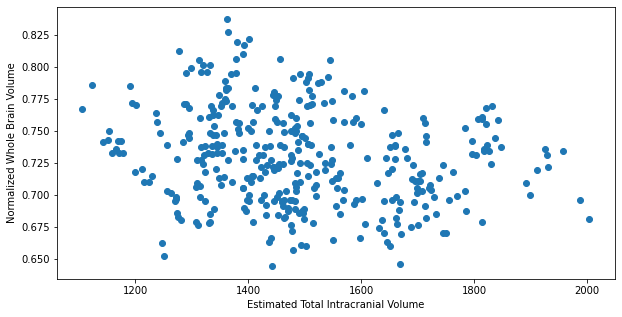

In [9]:
#plot showing the realtionship between Estimated Total Intracranial Volume and Normalized Whole Brain Volume
plt.figure(figsize=(10,5))
plt.scatter(df["eTIV"], df["nWBV"])
plt.xlabel("Estimated Total Intracranial Volume")
plt.ylabel("Normalized Whole Brain Volume")
plt.show()

The relationship is a negative correlation

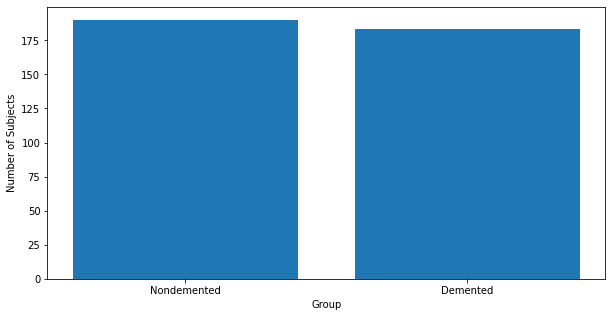

In [10]:
#bar plot for dementia group
plt.figure(figsize=(10,5))
plt.bar(df["Group"].unique(), df["Group"].value_counts())
plt.xlabel("Group")
plt.ylabel("Number of Subjects")
plt.show()

The dataset is a bit balanced between the two subject groups

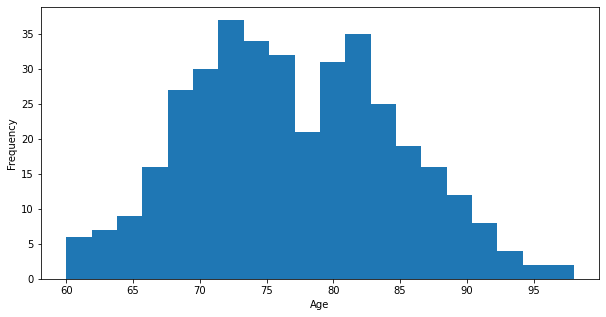

In [11]:
#histogram for age
plt.figure(figsize=(10,5))
plt.hist(df["Age"], bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [12]:
import seaborn as sns

The age distribution ranges from 60 to 100 years

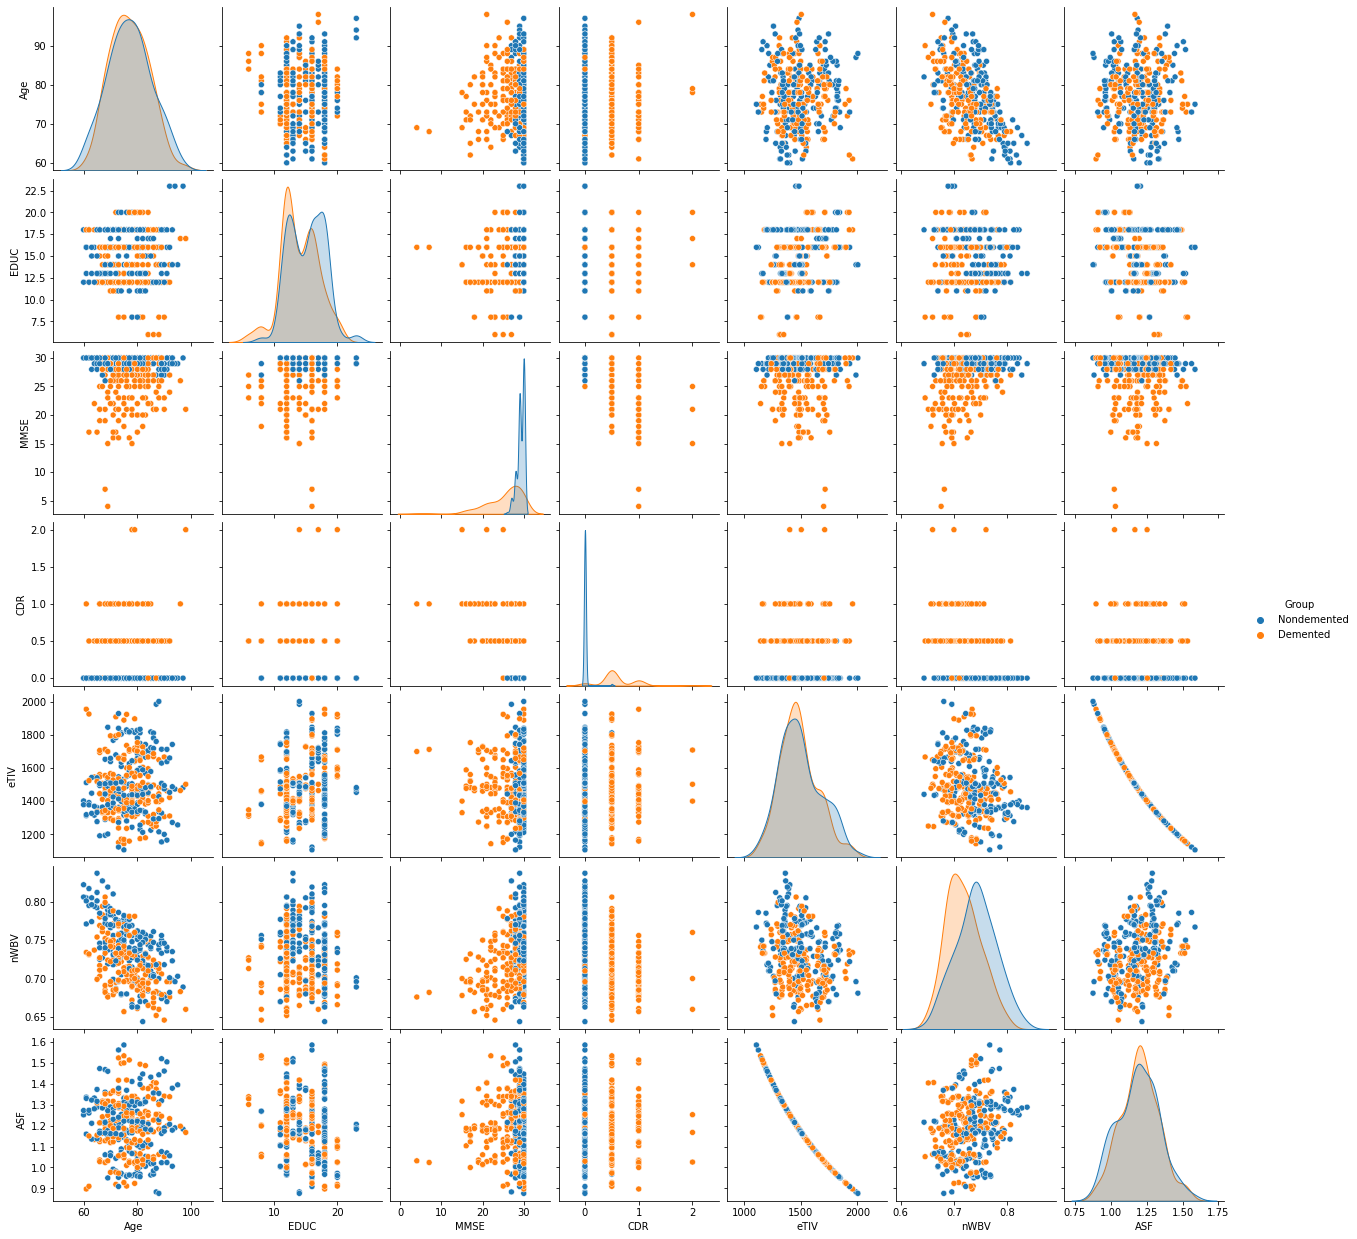

In [13]:
sns.pairplot(df.drop(columns=["SES","MR Delay"]), hue="Group")

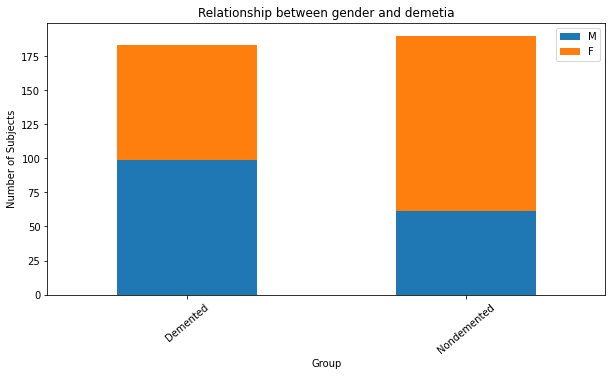

In [14]:
#plot to show the relationship between gender and dementia
demented = df[df["Group"]=="Demented"]["M/F"].value_counts()
nondemented = df[df["Group"]=="Nondemented"]["M/F"].value_counts()

group_df = pd.DataFrame([demented, nondemented])
group_df.index = ["Demented", "Nondemented"]
group_df.plot(kind='bar', stacked=True, figsize=(10,5))
plt.xlabel("Group")
plt.ylabel("Number of Subjects")
plt.title("Relationship between gender and demetia")
plt.xticks(rotation=40)
plt.show()



The chart shows men are more likely to have dementia as compared to females

In [15]:
import seaborn as sns

def facet_grid(feature):
    facet = sns.FacetGrid(df, hue="Group", aspect=3)
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(0, df[feature].max()))
    facet.add_legend()


(50.0, 98.0)

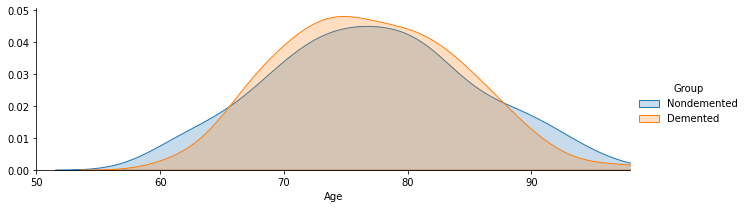

In [16]:
facet_grid("Age")
plt.xlim(df["Age"].min()-10,df["Age"].max())

People with dementia are usually between 70 and 80 years

(0.876, 1.587)

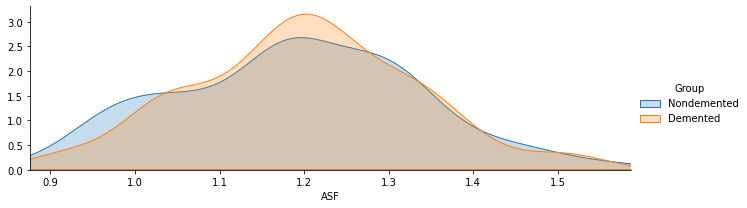

In [17]:
facet_grid("ASF")
plt.xlim(df["ASF"].min(),df["ASF"].max())

From the chart, demented people have a higher atlas scaling factor

(0.644, 0.837)

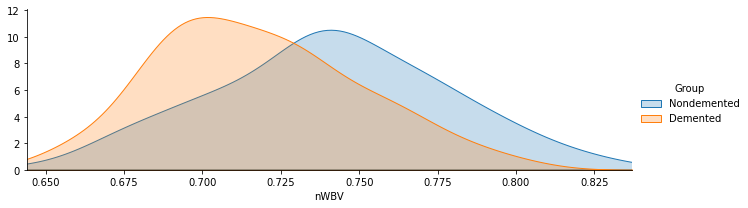

In [18]:
facet_grid("nWBV")
plt.xlim(df["nWBV"].min(),df["nWBV"].max())

Demented people have a lower nWBV value than non-demented people

Text(0.5, 1.0, 'Relationship between demetia and education')

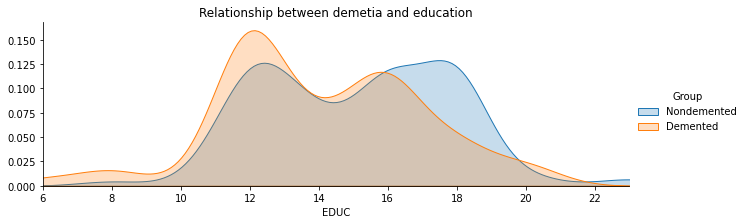

In [19]:
facet_grid("EDUC")
plt.xlim(df["EDUC"].min(),df["EDUC"].max())
plt.title("Relationship between demetia and education")

From the chart, the number of people with dementia is more concentrated on the left than the number of people without deimentia. This means that, people with dementia are usually less educated

Inference from the charts
- People with dementia are usually between 70 and 80 years
- Men are more likely to have dimentia as compared to females
- People with dementia are usually less educated

In [20]:
#check for null values
df.isnull().sum()


Group        0
MR Delay     0
M/F          0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

In [21]:
#dropping all rows with null values
df = df.dropna(axis=0)
df.isnull().sum()

Group       0
MR Delay    0
M/F         0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

In [22]:
#check for group balance
df["Group"].value_counts()

Nondemented    190
Demented       164
Name: Group, dtype: int64

In [23]:
#One-hot encoding for categorical features
df["Group"] = np.where(df["Group"] == "Demented", 1, 0)
df["M/F"] = np.where(df["M/F"] == "M", 1, 0)
df.head()

,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,0,538,0,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,0,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039


##### Grouping dataset into target and descriptive features

In [24]:

X = df.drop(columns=["Group"], axis=1)
y = df["Group"]

#### Importing metrics and some ML algorithms

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Splitting and scaling the data

The MinMax scaler is chosen because original distribution of data is preserved and the data is kept in a bounded interval

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#normalizing the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Training a logistic regression model with our data for a range of regularization values

In [27]:
#training a logistic regression model with a list of c values to obtain the best c value

c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c in c:
    logreg = LogisticRegression(C=c, random_state=42)
    logreg.fit(X_train_scaled, y_train)
    y_pred = logreg.predict(X_test_scaled)
    print("Accuracy for c = ", c, ": ", accuracy_score(y_test, y_pred))

Accuracy for c =  0.001 :  0.5514018691588785
Accuracy for c =  0.01 :  0.6542056074766355
Accuracy for c =  0.1 :  0.8317757009345794
Accuracy for c =  1 :  0.9065420560747663
Accuracy for c =  10 :  0.9158878504672897
Accuracy for c =  100 :  0.9158878504672897
Accuracy for c =  1000 :  0.9065420560747663


#### Performing 5 fold cross validation
The model maybe be overfitting hence we are peroming cross validation to test the performance of our model on unseen data

5 fold cross validation can train the model with enough data and leave enough for testing. This keeps our important features.

In [28]:
#perform cross validation to avoid overfitting
from sklearn.model_selection import cross_val_score
c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
scores_array = []
for c in c:
    logreg = LogisticRegression(C=c, random_state=42)
    scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring="accuracy")
    scores_array.append(scores.mean())
    print("Accuracy for c = ", c, ": ", scores.mean())


Accuracy for c =  0.001 :  0.5303673469387756
Accuracy for c =  0.01 :  0.5750204081632653
Accuracy for c =  0.1 :  0.813469387755102
Accuracy for c =  1 :  0.9311836734693877
Accuracy for c =  10 :  0.9553469387755102
Accuracy for c =  100 :  0.9512653061224491
Accuracy for c =  1000 :  0.9471836734693877


C:\Users\Russell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Plotting the accuracy for our regularization values

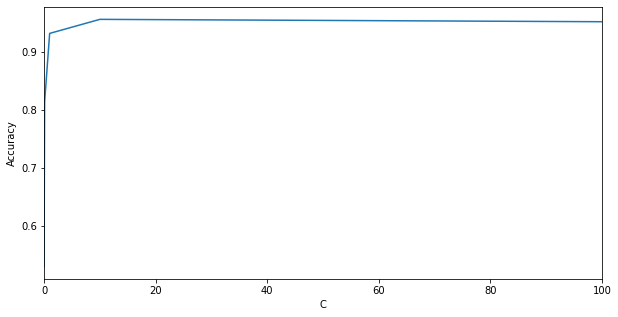

In [29]:
#plot the accuracy score for each c value
c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
plt.figure(figsize=(10,5))
plt.plot(c, scores_array)
plt.xlabel("C")
plt.xlim(0,100)
plt.ylabel("Accuracy")
plt.show()

c=10 is the best value since accuracy begins to reduce for higher regularization values

#### Classification report for logistic regression model
- *The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.*

- *The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.*

- *The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.*

- *The support is the number of occurrences of each class in y_true.*

In [30]:
#train logistic regression model with c to be 10 and generate confusion matrix
logreg = LogisticRegression(C=10, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
print("Accuracy for c = 10: ", accuracy_score(y_test, y_pred))
print("Report: ", classification_report(y_test, y_pred))


Accuracy for c = 10:  0.9158878504672897
Report:                precision    recall  f1-score   support

           0       0.89      0.97      0.93        59
           1       0.95      0.85      0.90        48

    accuracy                           0.92       107
   macro avg       0.92      0.91      0.91       107
weighted avg       0.92      0.92      0.92       107



#### Confusion matrix

![confusion matrix diagram](https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png)

In [31]:
print(confusion_matrix(y_test, y_pred))

[[57  2]
 [ 7 41]]


#### Training with Decison Tree Classifier

In [32]:
#training data with Decision Tree Classifier
maximum_depths = [1,2,3,4,5,6,7,8,9,10]
scores_array = []
for max_depth in maximum_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    scores = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring="accuracy")
    scores_array.append(scores.mean())
    print("Accuracy for max_depth = ", max_depth, ": ", scores.mean())

Accuracy for max_depth =  1 :  0.9553469387755102
Accuracy for max_depth =  2 :  0.9553469387755102
Accuracy for max_depth =  3 :  0.9553469387755102
Accuracy for max_depth =  4 :  0.9434285714285714
Accuracy for max_depth =  5 :  0.9431836734693878
Accuracy for max_depth =  6 :  0.9473469387755102
Accuracy for max_depth =  7 :  0.9473469387755102
Accuracy for max_depth =  8 :  0.9433469387755103
Accuracy for max_depth =  9 :  0.9351836734693878
Accuracy for max_depth =  10 :  0.9351836734693878


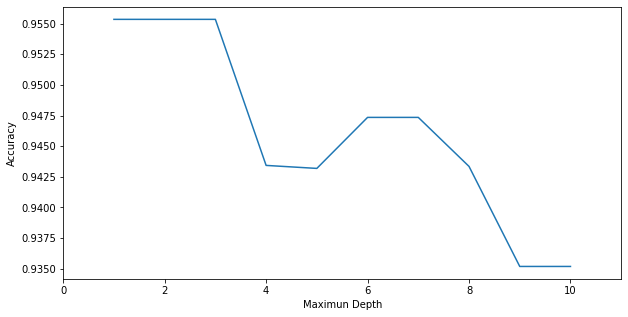

In [33]:
#plot the accuracy score for each max_depth
maximum_depths = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(10,5))
plt.plot(maximum_depths, scores_array)
plt.xlabel("Maximun Depth")
plt.xlim(0,11)
plt.ylabel("Accuracy")
plt.show()  


a maximum depth of 3 can be taken as the optimal value

In [34]:
#train decision tree classifier with max_depth = 3
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)
print("Accuracy for max_depth = 3: ", accuracy_score(y_test, y_pred))
print("Report: ", classification_report(y_test, y_pred))


Accuracy for max_depth = 3:  0.9158878504672897
Report:                precision    recall  f1-score   support

           0       0.89      0.97      0.93        59
           1       0.95      0.85      0.90        48

    accuracy                           0.92       107
   macro avg       0.92      0.91      0.91       107
weighted avg       0.92      0.92      0.92       107



In [35]:
print(confusion_matrix(y_test, y_pred))

[[57  2]
 [ 7 41]]


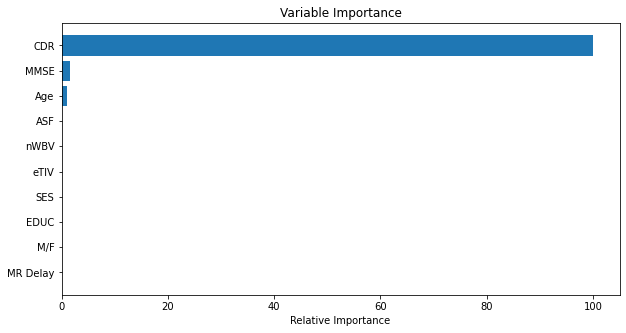

['MR Delay' 'M/F' 'EDUC' 'SES' 'eTIV' 'nWBV' 'ASF' 'Age' 'MMSE' 'CDR']


In [36]:
#feature importance
feature_importance = dt.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,5))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()
print(np.array(X.columns[sorted_idx]))


It is seen above that the Clinical Dementia Rating, Mini Mental State Examination and Age are the most important features in detecting early Alzhiemer's Disease.

## End of notebook